In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

path_pattern = './output/persistence/{}'
df = pd.read_pickle(path_pattern.format('df.pkl'))

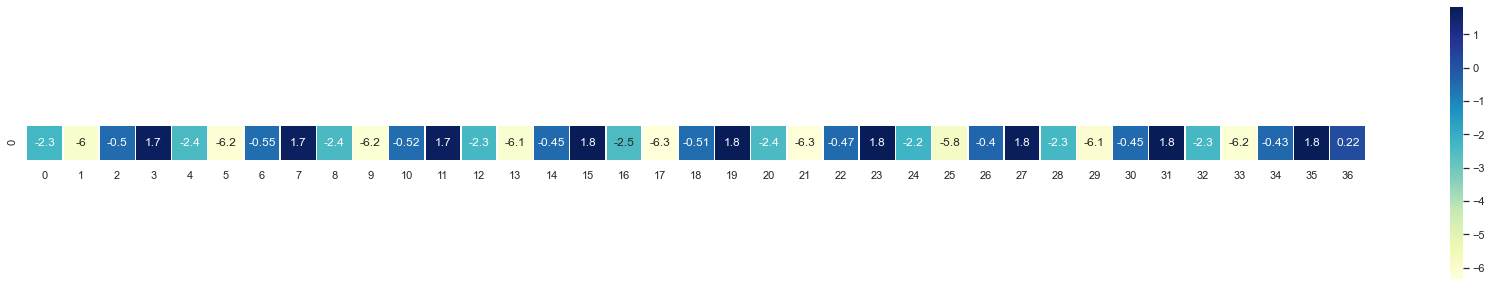

In [49]:
# Explore linear relationship between a predictor (feature) and response using covariance
# *(Note that the magnitude of covariance means NOTHING since predictors are not normalised and THUS a predictor with higher scale will give larger covariance value regardless of if strong/weak relationships)
sns.set(rc={'figure.figsize':(30,5)})
covMatrix = pd.DataFrame.cov(df.iloc[:,1:])
sns.heatmap([covMatrix['Y'].array], linewidths=.5, cmap='YlGnBu', annot=True, square=True)
plt.show()

V0 -  F-value: 995.117139, P-value: 0.0000000000
V1 -  F-value: 2971.031460, P-value: 0.0000000000
V2 -  F-value: 26.887052, P-value: 0.0000002223
V3 -  F-value: 251.646274, P-value: 0.0000000000
V4 -  F-value: 1115.431846, P-value: 0.0000000000
V5 -  F-value: 3270.268600, P-value: 0.0000000000
V6 -  F-value: 32.218742, P-value: 0.0000000144
V7 -  F-value: 243.796200, P-value: 0.0000000000
V8 -  F-value: 1116.753182, P-value: 0.0000000000
V9 -  F-value: 3241.247937, P-value: 0.0000000000
V10 -  F-value: 29.020896, P-value: 0.0000000741
V11 -  F-value: 252.593033, P-value: 0.0000000000
V12 -  F-value: 1027.067066, P-value: 0.0000000000
V13 -  F-value: 3127.234152, P-value: 0.0000000000
V14 -  F-value: 21.861428, P-value: 0.0000029905
V15 -  F-value: 284.135497, P-value: 0.0000000000
V16 -  F-value: 1162.561537, P-value: 0.0000000000
V17 -  F-value: 3517.360068, P-value: 0.0000000000
V18 -  F-value: 27.857770, P-value: 0.0000001348
V19 -  F-value: 283.480542, P-value: 0.0000000000
V20 - 

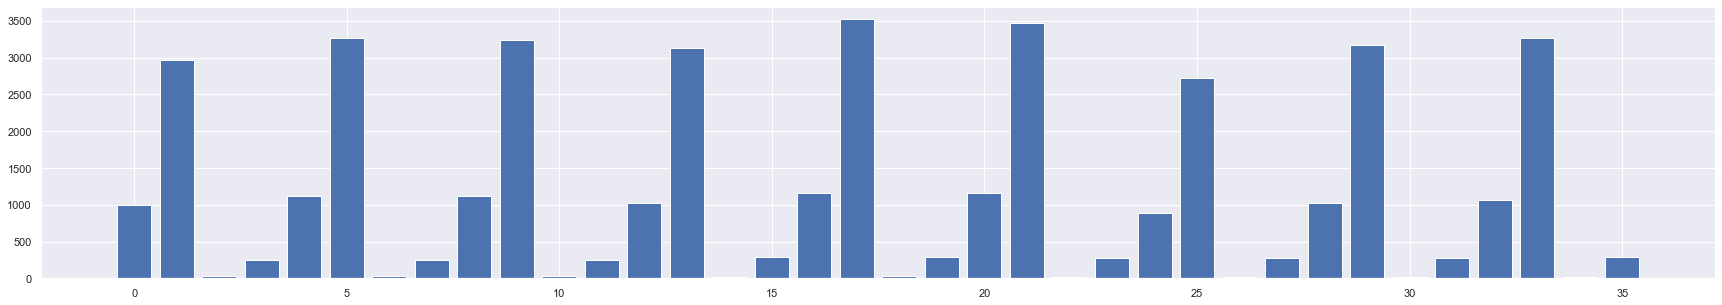

Features Selected (ANOVA): 
 Index(['V1', 'V5', 'V9', 'V13', 'V16', 'V17', 'V21', 'V25', 'V29', 'V33'], dtype='object')


In [50]:
# Compare the ratio of variance between a predictor (feature) VS a response, to identify relevance between two using an ANOVA F-test (relevance between numerical input & cat output)

# 'ANOVA' tests whether or not there are significant differences between the means of your independent varaibles (such as age, sex, income and stress level). This can be achieved with F-test by looking at F-value. 
# 'F-value' = (Sum of squared errors BETWEEN groups (group mean)/ degree of freedom) / (Sum of sqaured errors WITHIN groups / degree of freedom) 
# -> The high F-value means the variance of group means is higher than within groups (by group) meaning means between groups are varied
# -> Reject the null hypothesis that the group means are equal BETWEEN groups

# Distance between groups/compactness by group (when data points labelled by class)

# More reading: https://machinelearningmastery.com/feature-selection-with-numerical-input-data/ & Example: Compare level of stress by different condition (https://www.youtube.com/watch?v=-yQb_ZJnFXw)

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest # (Select Top N)
from sklearn.feature_selection import f_classif # (ANOVA F-test)

X = df.values[:,1:-1]
y = df.values[:,-1]

fs = SelectKBest(score_func=f_classif)
fs.fit(X, y)
X_new = fs.transform(X)

# List scores of F-value by feature
for i in range(len(fs.scores_)):
    print('V%d -  F-value: %f, P-value: %.10f' % (i, fs.scores_[i], fs.pvalues_[i]))

# Visualise them
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

# Select features by F-value (all p values seem below alpha level)
feature_cols_selected = df.columns[fs.get_support(indices=True) + 1]
print('Features Selected (ANOVA): \n', feature_cols_selected)

In [51]:
from common.plot_service import PlotService

service = PlotService(df)
pos_idx = (df.Y == 1)
neg_idx = (df.Y < 1)

service.plot_time_series('Positive Event Occured', pos_idx, list(feature_cols_selected))
service.plot_time_series('No Positive Event Occured', neg_idx, list(feature_cols_selected))
service.plot_dist(list(feature_cols_selected[:-4]))

SyntaxError: invalid syntax (<ipython-input-51-a40369177724>, line 9)

In [45]:
# Normalise a dataset
from sklearn.preprocessing import RobustScaler

# (Reduce the effect of outliers)
scaler = RobustScaler()
X = scaler.fit_transform(df[feature_cols_selected].iloc[:,2:-1])

# Split to train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)


(5148, 7) (5148,)


In [46]:
import pickle, gzip

path_pattern = './output/persistence/{}'
pickle.dump(X_train, gzip.open(path_pattern.format('X_train.gz'), 'wb'))
pickle.dump(X_test, gzip.open(path_pattern.format('X_test.gz'), 'wb'))
pickle.dump(y_train, gzip.open(path_pattern.format('y_train.gz'), 'wb'))
pickle.dump(y_test, gzip.open(path_pattern.format('y_test.gz'), 'wb'))